In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [3]:
#Reading the CSV file airbnbAMS.csv which has 5646 rows
ams = pd.read_csv("airbnbAMS.csv",sep=";")
# As borough, overall satisfaction have NaN data I am dropping them.
ams = ams.drop('borough', 1)
ams = ams.drop('overall_satisfaction', 1)
ams = ams.drop('last_modified', 1)
ams.head()

,room_id,host_id,room_type,neighborhood,reviews,accommodates,bedrooms,price,minstay,latitude,longitude
0,2818,3159,Private room,Oostelijk Havengebied / Indische Buurt,77,2,1.0,90.0,3,52.365.755,4.941.419
1,6243,3813,Private room,Oostelijk Havengebied / Indische Buurt,116,4,1.0,75.0,2,52.379.212,4.926.324
2,15061,59297,Private room,Westerpark,53,4,1.0,66.0,2,52.382.685,487.613
3,15865,59484,Private room,Centrum Oost,1,4,1.0,151.0,3,52.363.786,4.893.392
4,20168,59484,Private room,Centrum Oost,4,2,1.0,90.0,3,52.365.087,4.893.541


In [4]:
#Removing the rows which do not have the data of the number of bedrooms
ams.dropna(subset =['bedrooms'], how='any', inplace = True) 
# Resetting index 
ams = ams.reset_index(drop=True)
#Removing the '.' in the latitude and longitude
ams.latitude = ams.latitude.str.replace(".", "")
ams.longitude = ams.longitude.str.replace(".", "")

ams

,room_id,host_id,room_type,neighborhood,reviews,accommodates,bedrooms,price,minstay,latitude,longitude
0,2818,3159,Private room,Oostelijk Havengebied / Indische Buurt,77,2,1.0,90.0,3,52365755,4941419
1,6243,3813,Private room,Oostelijk Havengebied / Indische Buurt,116,4,1.0,75.0,2,52379212,4926324
2,15061,59297,Private room,Westerpark,53,4,1.0,66.0,2,52382685,487613
3,15865,59484,Private room,Centrum Oost,1,4,1.0,151.0,3,52363786,4893392
4,20168,59484,Private room,Centrum Oost,4,2,1.0,90.0,3,52365087,4893541
5,20522,77484,Entire home/apt,De Pijp / Rivierenbuurt,139,2,1.0,92.0,2,52354818,4888065
6,22315,10378458,Entire home/apt,Oud Oost,6,6,2.0,153.0,3,52357946,4916384
7,23651,9616,Private room,De Pijp / Rivierenbuurt,36,3,1.0,122.0,6,52345911,4891983
8,25488,106225,Entire home/apt,Oostelijk Havengebied / Indische Buurt,46,6,3.0,229.0,3,5236501,4943572
9,27573,119217,Private room,Centrum Oost,53,2,1.0,174.0,3,52364293,4897716


In [5]:
#0 for Private room
#1 for Entire home
#2 for Shared room

for i in range(0,5614):
    if ams['room_type'][i] == "Private room":
        ams['room_type'][i] = 0
    if ams['room_type'][i] == "Entire home/apt":
        ams['room_type'][i] = 1
    if ams['room_type'][i] == "Shared room":
        ams['room_type'][i] = 2
    


/Users/shuklap/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/shuklap/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/shuklap/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
#Creating a feature that influences the target cariable : price
Feature = ams[['accommodates','bedrooms','minstay','room_type','reviews','longitude','latitude']]

Feature



,accommodates,bedrooms,minstay,room_type,reviews,longitude,latitude
0,2,1.0,3,0,77,4941419,52365755
1,4,1.0,2,0,116,4926324,52379212
2,4,1.0,2,0,53,487613,52382685
3,4,1.0,3,0,1,4893392,52363786
4,2,1.0,3,0,4,4893541,52365087
5,2,1.0,2,1,139,4888065,52354818
6,6,2.0,3,1,6,4916384,52357946
7,3,1.0,6,0,36,4891983,52345911
8,6,3.0,3,1,46,4943572,5236501
9,2,1.0,3,0,53,4897716,52364293


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# doing a 0.7/0.3 split
X = Feature
X_train, X_test, y_train, y_test = train_test_split( X, ams['price'], test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (3929, 7) (3929,)
Test set: (1685, 7) (1685,)


In [13]:

k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
#neigh

#PREDICT
yhat = neigh.predict(X_test)


from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

Train set Accuracy:  0.233138203105
Test set Accuracy:  0.0284866468843


array([ 0.02908012,  0.03086053,  0.02908012,  0.03145401,  0.03026706,
        0.02848665,  0.02670623,  0.02848665,  0.03145401,  0.03204748,
        0.03204748,  0.03976261,  0.03976261,  0.04035608,  0.03857567,
        0.03916914,  0.03738872,  0.03857567,  0.04094955,  0.04510386,
        0.04569733,  0.04807122,  0.04925816,  0.04925816,  0.05103858,
        0.04747774,  0.0462908 ,  0.04747774,  0.04688427,  0.04747774,
        0.04985163,  0.04807122,  0.04925816,  0.04688427,  0.04807122,
        0.0462908 ,  0.04747774,  0.04569733,  0.0462908 ,  0.04510386,
        0.04154303,  0.04332344,  0.04391691,  0.03976261,  0.0421365 ,
        0.04391691,  0.04391691,  0.04391691,  0.04154303,  0.03976261,
        0.0421365 ,  0.0421365 ,  0.04391691,  0.04035608,  0.0421365 ,
        0.0421365 ,  0.04391691,  0.04272997,  0.0421365 ,  0.04035608,
        0.04154303,  0.0421365 ,  0.04154303,  0.04094955,  0.03976261,
        0.03916914,  0.03857567,  0.03976261,  0.04094955,  0.03

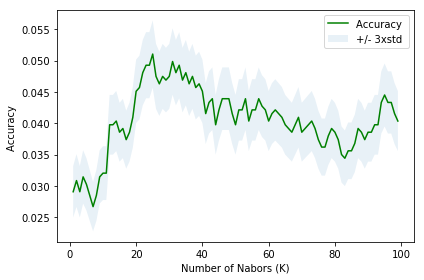

In [14]:
#Plotting to check the various accuracies at different k
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [30]:
print( "The best accuracy was ", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was  0.0510385756677 with k= 25


In [31]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

/Users/shuklap/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.026747089772955493

In [32]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.039762611275964393

In [33]:
k = 25

neigh = KNeighborsClassifier(n_neighbors = 25).fit(X_train,y_train)
#neigh

#PREDICT THE PRICE ON THE TEST CASE
yhat = neigh.predict(X_test)

In [34]:
yhat

array([  32.,  115.,  121., ...,  145.,  184.,  122.])